In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("../Data_set/Mall_Customers.csv")


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
attributes=df.columns
attributes

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.shape

(200, 5)

## Data Preprocessing

/tmp/ipykernel_95266/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

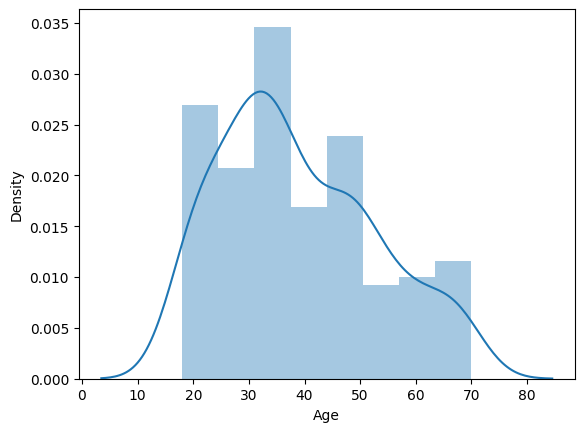

In [7]:
sns.distplot(df['Age'])

/tmp/ipykernel_95266/1994242243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

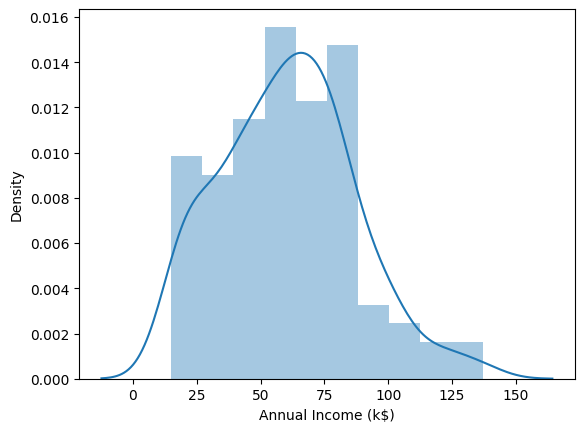

In [8]:
sns.distplot(df['Annual Income (k$)'])

/tmp/ipykernel_95266/3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

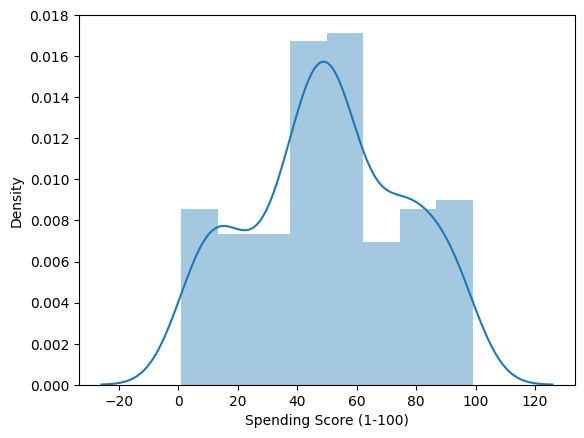

In [9]:
sns.distplot(df['Spending Score (1-100)'])

<Axes: >

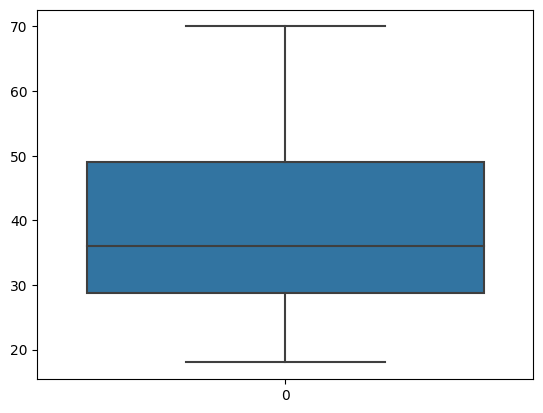

In [10]:
# We have to predict the outliers and remove them as they hinder with our data
sns.boxplot(df['Age'])


<Axes: >

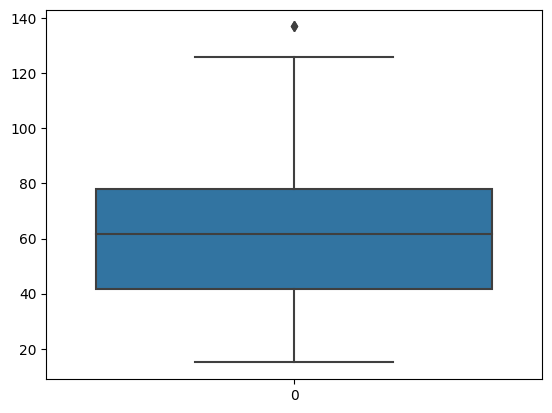

In [11]:
sns.boxplot(df['Annual Income (k$)'])

In [12]:
# Removing outliers from Annual Income
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

<Axes: >

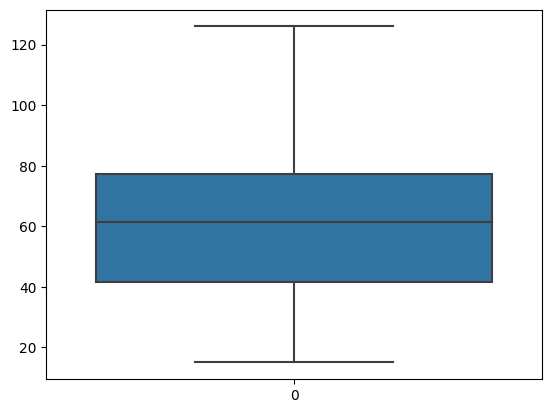

In [13]:
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

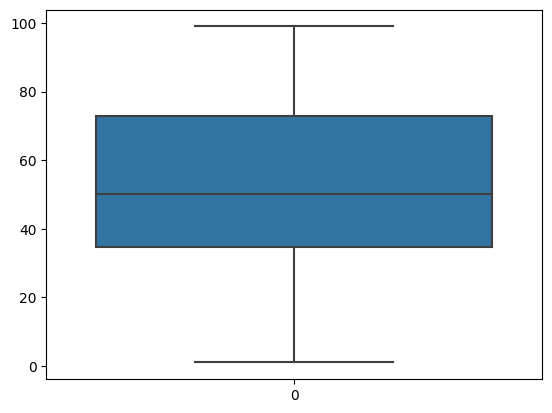

In [14]:
sns.boxplot(df['Spending Score (1-100)'])


/home/godslayer/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


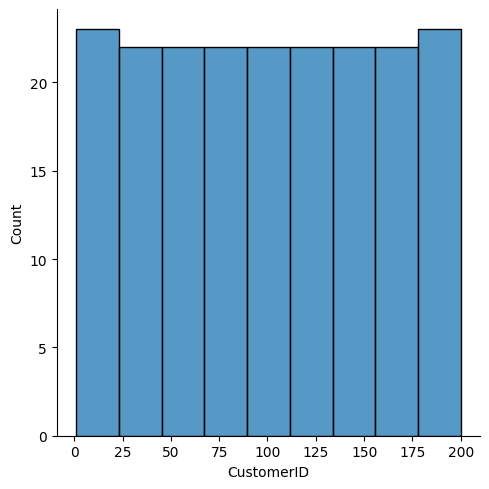

In [15]:
sns.displot(df['CustomerID'])
# We can drop customer id as it is not needed in the algorithm

In [16]:
df=df.drop(['CustomerID'],axis=1)

In [17]:
# We need to encode the gender column as it is categorical
# We can use label encoder for this purpose
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


/home/godslayer/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


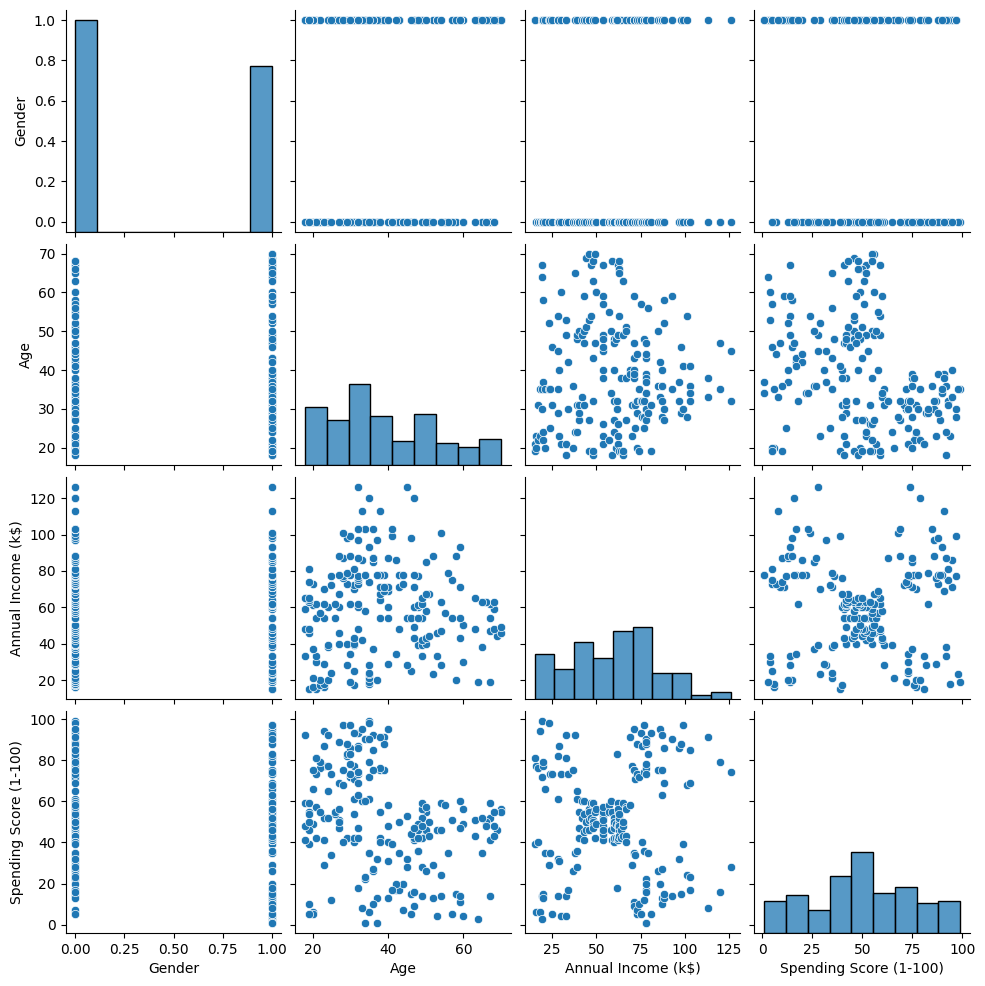

In [20]:
sns.pairplot(df)

In [21]:
df.corr(numeric_only=True)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.024997,-0.058109
Age,0.060867,1.000000,0.004013,-0.327227
Annual Income (k$),0.024997,0.004013,1.000000,0.010007
Spending Score (1-100),-0.058109,-0.327227,0.010007,1.000000


<Axes: >

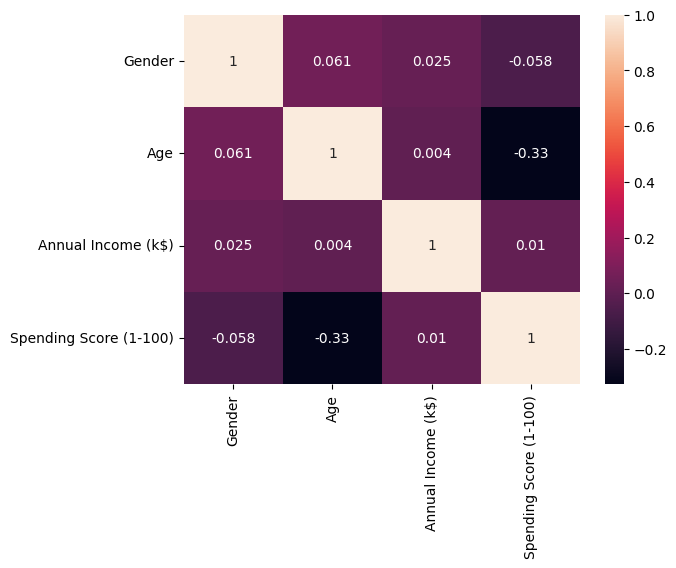

In [22]:
sns.heatmap(df.corr(),annot=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)

In [24]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)

In [25]:
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [26]:
from sklearn import cluster
error=[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(df_scaled)
    error.append(kmeans.inertia_)


/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

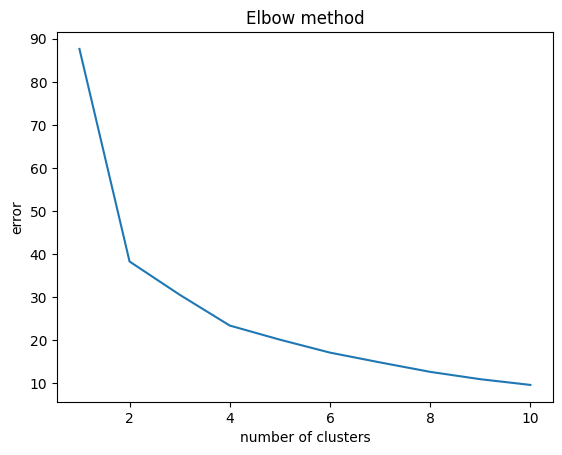

In [27]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [28]:
km_model = cluster.KMeans(n_clusters=2,init = 'k-means++',random_state=0)
# km_model_2=cluster.KMeans(n_clusters=2,init = 'k-means++',random_state=0)

In [29]:
km_model.fit(df_scaled)

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [30]:
km_model.predict(df_scaled)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

In [31]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


In [33]:
km_model.predict([[1,19,15.0,39]])

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [34]:
km_model.predict([[1,19,15.0,59]])

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)